In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/Users/prosenjeetsaha/Desktop/Dataset/powerconsumption.txt", sep=';', parse_dates={'DateTime':['Date','Time']},infer_datetime_format=True,na_values=['nan','?'], index_col='DateTime')
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [2]:
data.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='DateTime', length=2075259, freq=None)

In [3]:
# Time resampling
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [4]:
data.shape

(2075259, 7)

In [5]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
cols=list(data.columns)

In [7]:
for col in cols:
    data[col].fillna(data[col].mean(), inplace=True)

In [8]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
data[cols]=data[cols].astype('float64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [11]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [12]:
df_list=[]
rules={'D':'daily','M':'monthly','Q':'quarterly','A':'annually'}

d=defaultdict(list)
for rule in list(rules.keys()):    
       d[rules[rule]]=[data[col].resample(rule) for col in cols]

In [13]:
def resample_data(dict_val, freq, func):
    if func=='mean':
        
        for i in range(len(dict_val)):
            title=func+ ' of '+cols[i]+' sampled '+freq
            dict_val[freq][i].mean().plot(figsize=(20,6), title=title)
            plt.show()
    elif func=='min' :
        
        for i in range(len(dict_val)):
            title=func+ ' of '+cols[i]+' sampled '+freq
            dict_val[freq][i].min().plot(figsize=(15,6), title=title)
            plt.show()
    elif func=='max' :
        
        for i in range(len(dict_val)):
            title=func+ ' of '+cols[i]+' sampled '+freq
            dict_val[freq][i].max().plot(figsize=(15,6), title=title)
            plt.show()
    elif func=='sum' :
        
        for i in range(len(dict_val)):
            title=func+ ' of '+cols[i]+' sampled '+freq
            dict_val[freq][i].sum().plot(figsize=(15,6), title=title)
            plt.show()

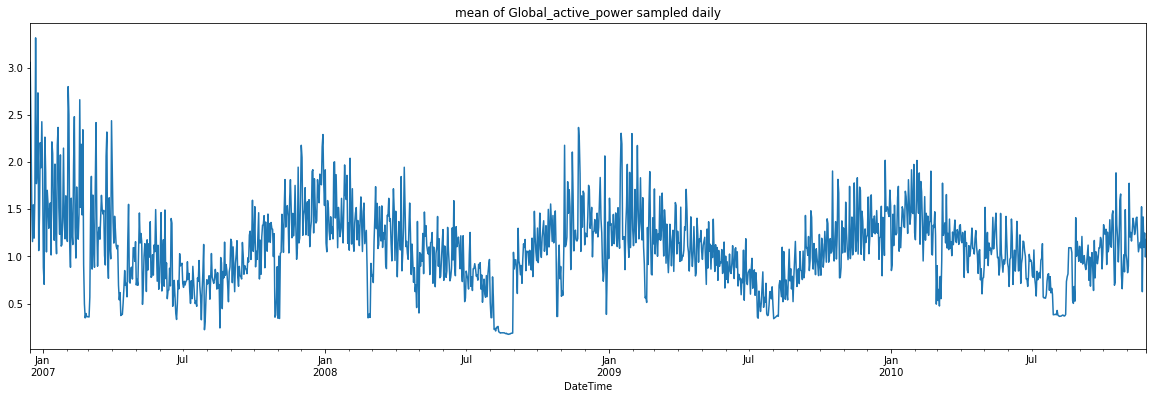

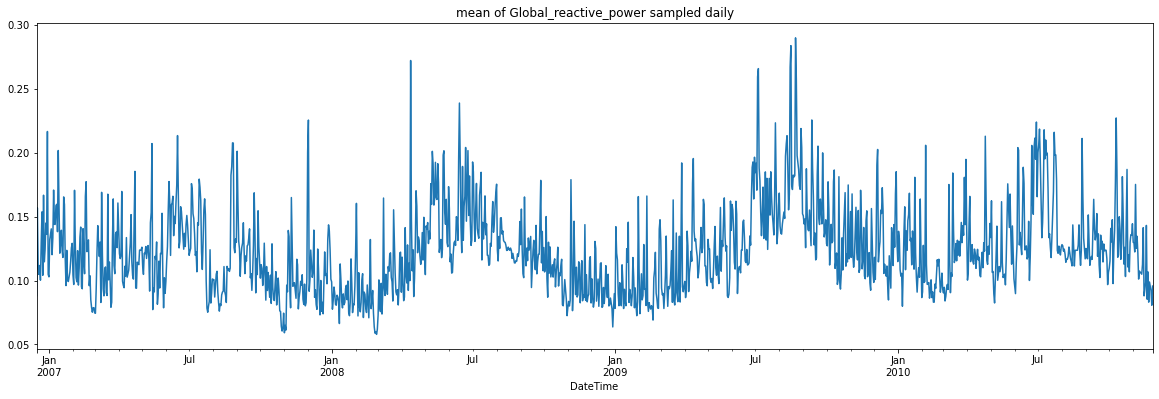

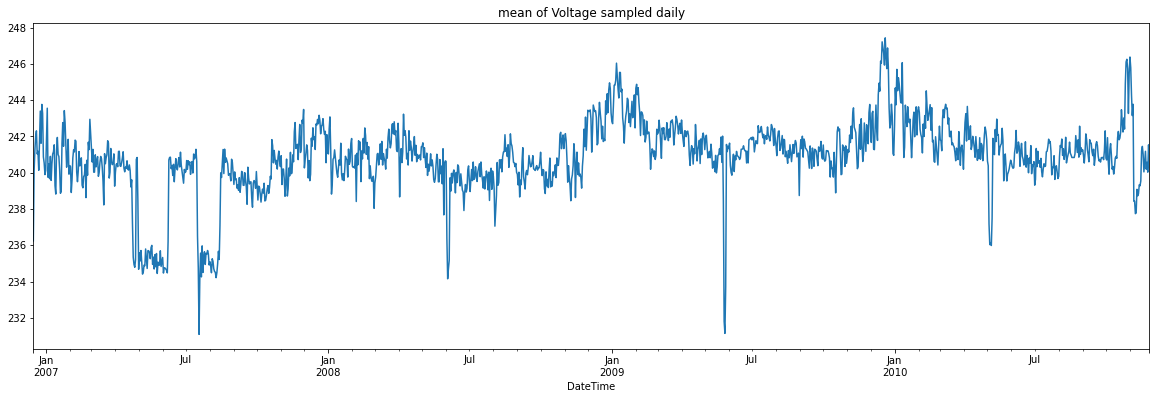

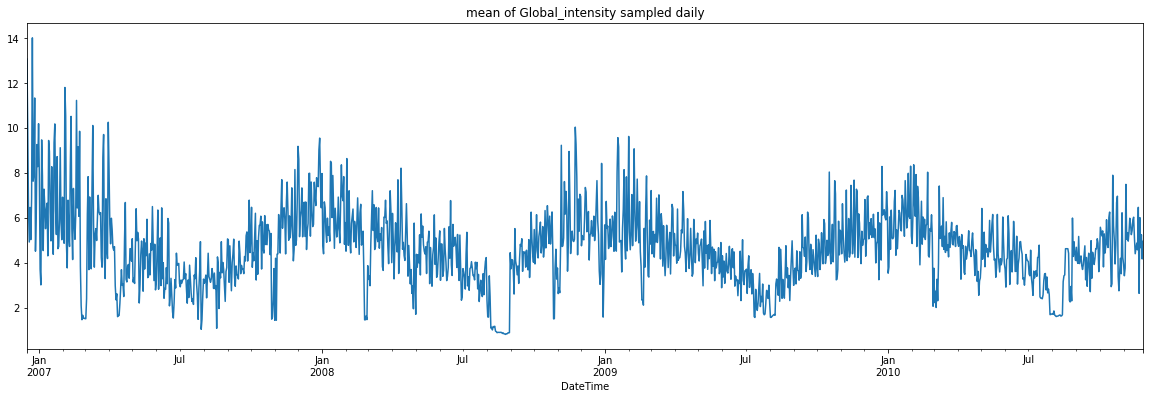

In [14]:
resample_data(d,'daily','mean')

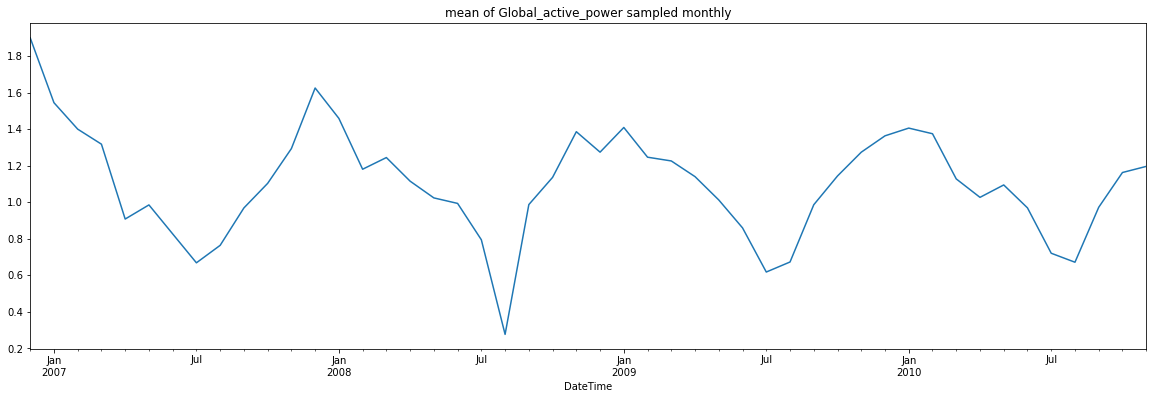

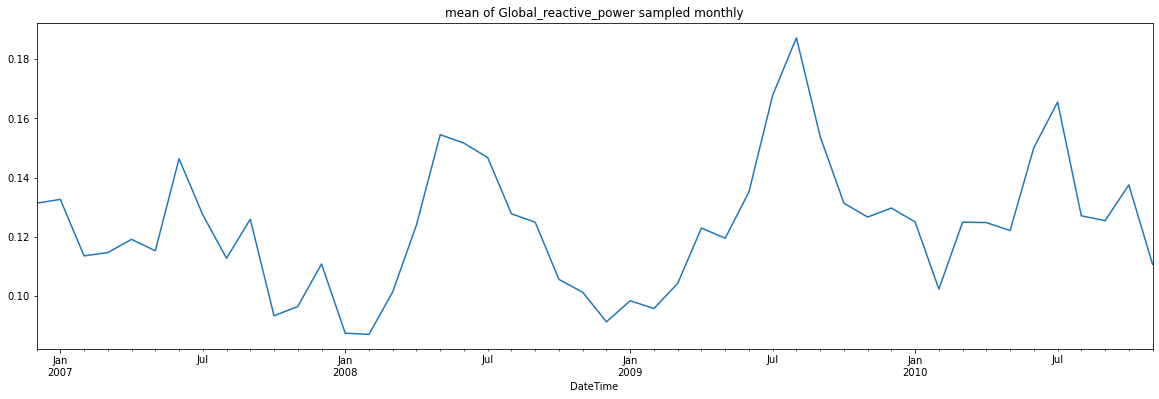

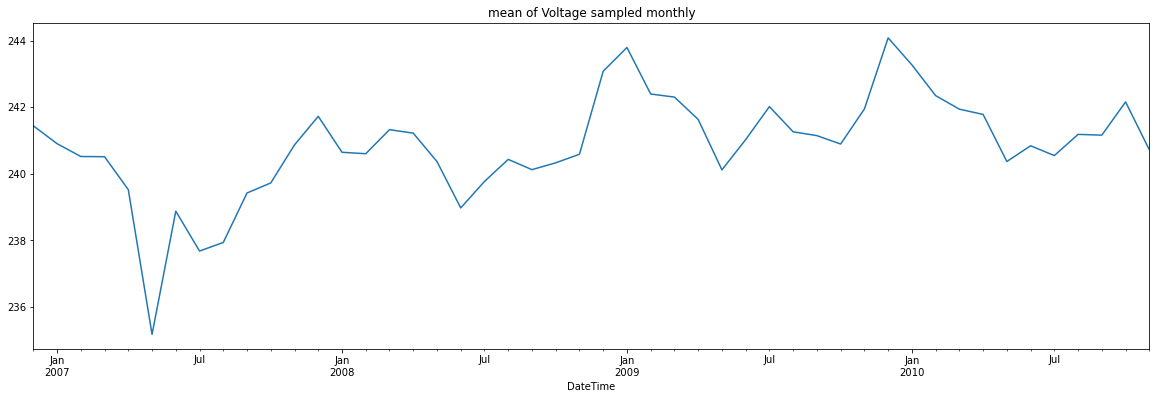

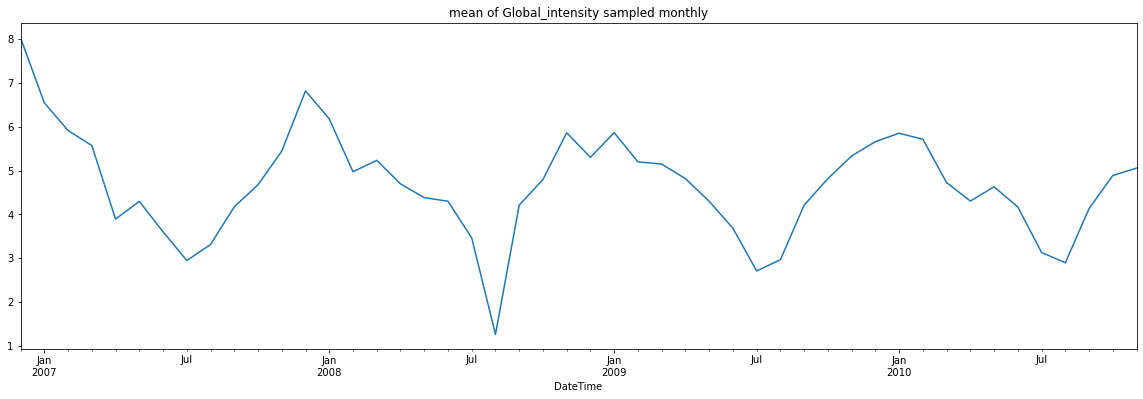

In [15]:
resample_data(d,'monthly','mean')

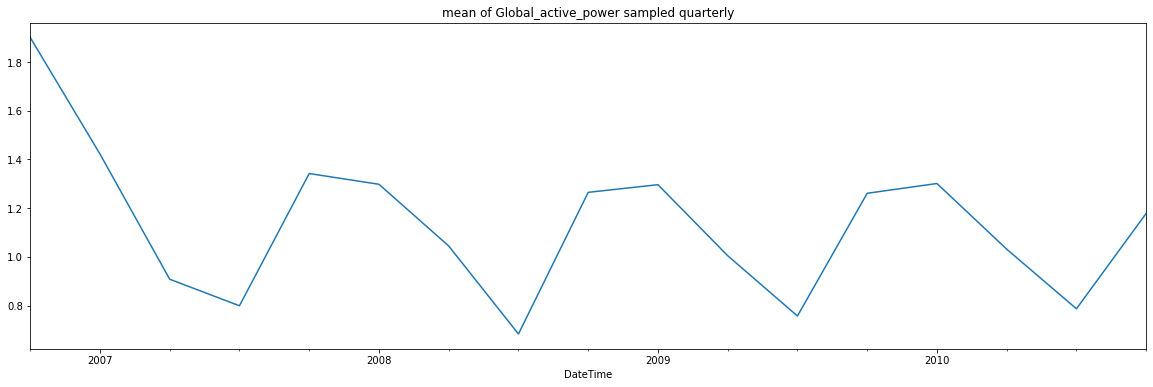

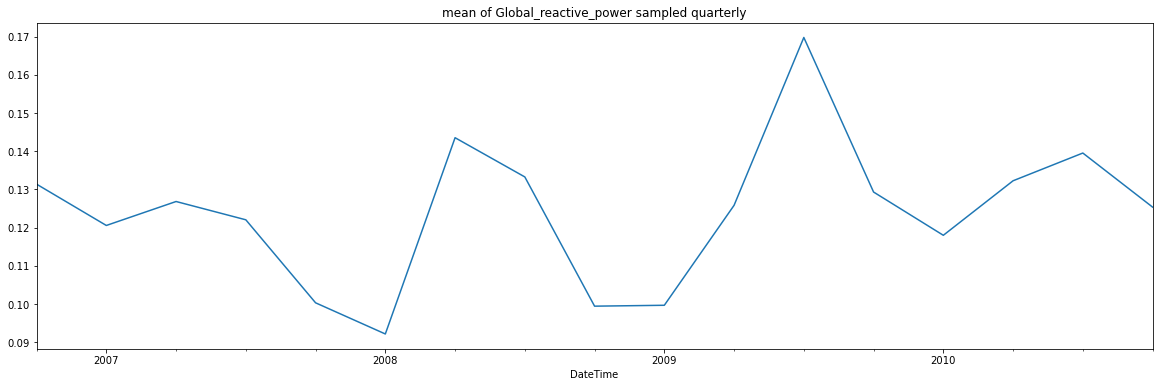

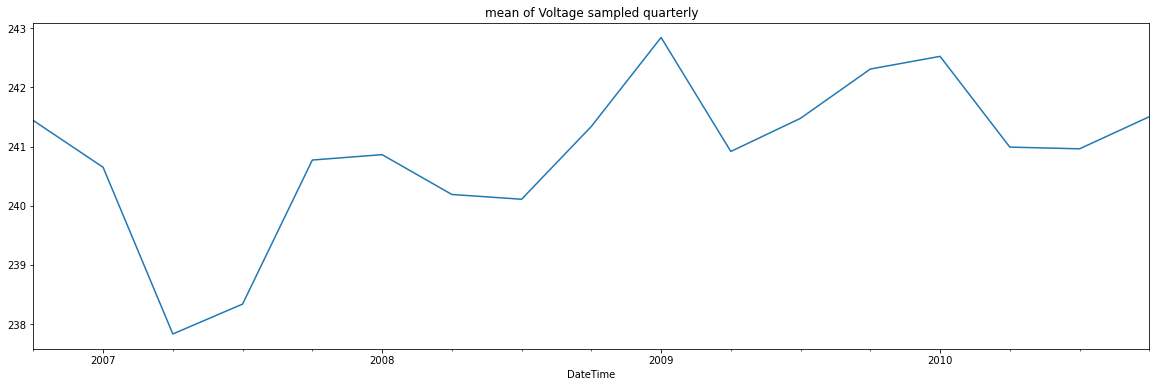

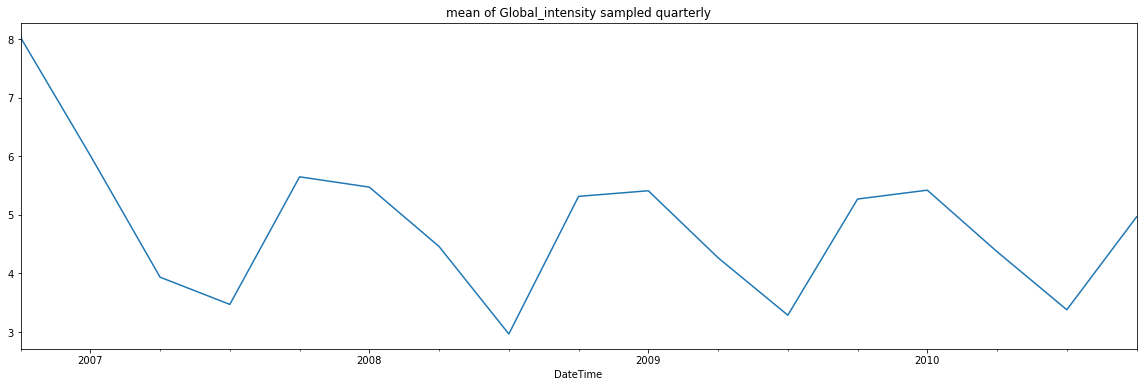

In [16]:
resample_data(d,'quarterly','mean')

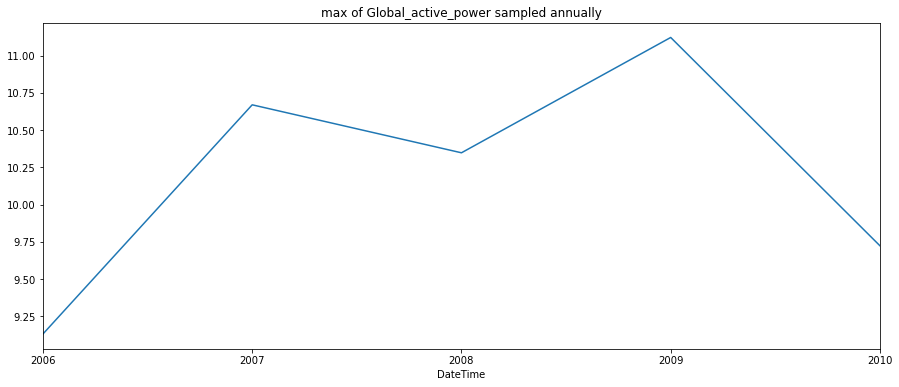

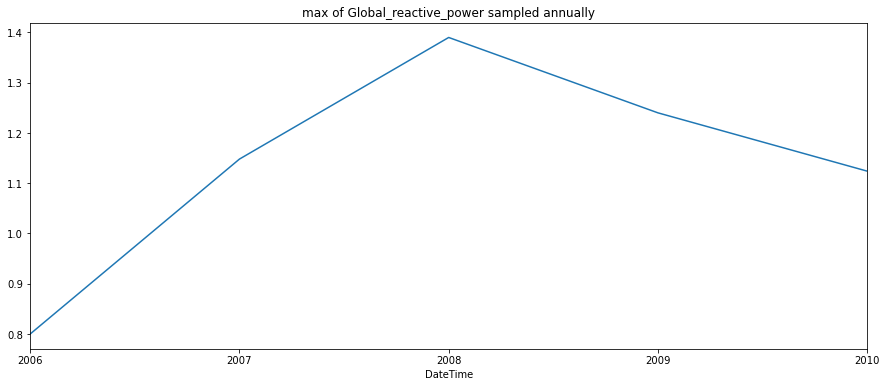

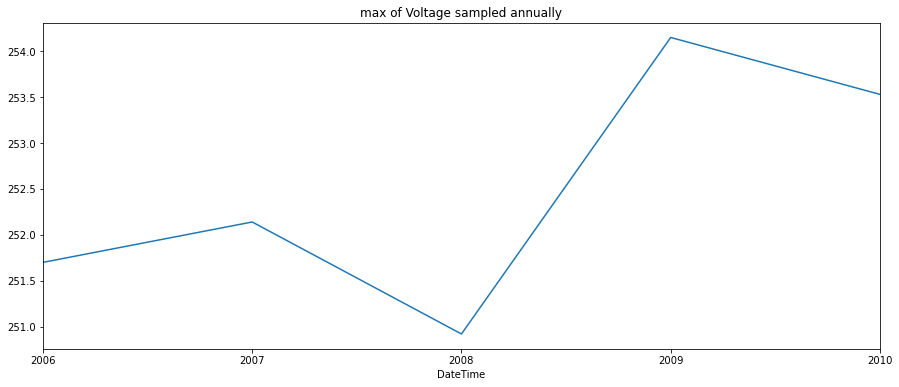

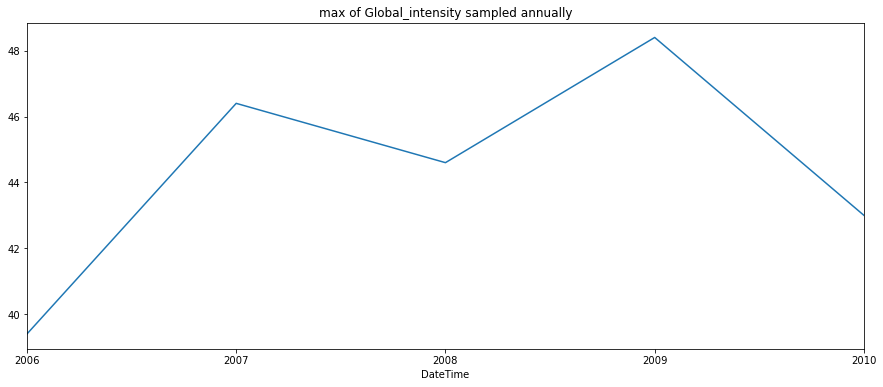

In [17]:
resample_data(d,'annually','max')

In [18]:
#data['6-month-SMA']=data.Global_intensity.rolling(window=6).mean()
#data['12-month-SMA']=data.Global_intensity.rolling(window=12).mean()

In [19]:
#data[['Global_intensity','6-month-SMA','12-month-SMA']].plot(figsize=(30,20))
#plt.show()

In [20]:
#data['12-month-EWMA']=tr_data.Global_intensity.ewm(span=12).mean()
#data[['Global_intensity','12-month-EWMA']].plot(figsize=(30,20))
#plt.show()

In [21]:
data=data.loc['2010-11-01':]

In [22]:
# Split the data

In [23]:
test_idx=24*60*2

In [24]:
train=data.iloc[:-test_idx]
test=data.iloc[-test_idx:]

In [25]:
train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-11-01 00:00:00,1.368,0.080,246.50,5.6,0.0,0.0,1.0
2010-11-01 00:01:00,1.368,0.080,246.55,5.6,0.0,0.0,1.0
2010-11-01 00:02:00,1.366,0.080,246.46,5.6,0.0,0.0,1.0
2010-11-01 00:03:00,1.312,0.000,246.20,5.4,0.0,0.0,0.0
2010-11-01 00:04:00,1.268,0.062,246.10,5.2,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2010-11-24 20:58:00,1.956,0.000,231.18,8.4,0.0,0.0,16.0
2010-11-24 20:59:00,1.954,0.000,230.86,8.4,0.0,0.0,17.0
2010-11-24 21:00:00,1.950,0.000,230.54,8.4,0.0,0.0,16.0


In [26]:
test

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-11-24 21:03:00,2.058,0.154,230.87,8.8,0.0,0.0,16.0
2010-11-24 21:04:00,2.052,0.154,230.84,8.8,0.0,0.0,17.0
2010-11-24 21:05:00,2.050,0.154,230.89,8.8,0.0,0.0,16.0
2010-11-24 21:06:00,2.098,0.108,230.61,9.0,0.0,0.0,16.0
2010-11-24 21:07:00,2.096,0.060,231.67,9.0,0.0,0.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [1]:
#Scale data
from sklearn.preprocessing import MinMaxScaler

In [28]:
sc=MinMaxScaler()
sc.fit(train)
train_sc=sc.transform(train)
test_sc=sc.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
train_sc.shape

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inlineimport math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

UsageError: unrecognized arguments: math


In [7]:
df=pd.read_csv("/Users/prosenjeetsaha/Desktop/Dataset/powerconsumption.txt", sep=';')
df.head()
print('Number of rows and columns:', df.shape)

Number of rows and columns: (2075259, 9)


In [8]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [13]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna(subset=['Global_active_power'])
df['date_time']=pd.to_datetime(df['date_time'])

In [12]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.2160,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.3600,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.3740,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.3880,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.6660,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00


In [15]:
df['year'] = df['date_time'].apply(lambda x: x.year)
df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
df['month'] = df['date_time'].apply(lambda x: x.month)
df['day'] = df['date_time'].apply(lambda x: x.day)

In [17]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year,quarter,month,day
0,16/12/2006,17:24:00,4.2160,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00,2006,4,12,16
1,16/12/2006,17:25:00,5.3600,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00,2006,4,12,16
2,16/12/2006,17:26:00,5.3740,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00,2006,4,12,16
3,16/12/2006,17:27:00,5.3880,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00,2006,4,12,16
4,16/12/2006,17:28:00,3.6660,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00,2006,4,12,16


In [18]:
df=df.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]
df.sort_values('date_time', inplace=True, ascending=True)
df = df.reset_index(drop=True)

In [19]:
df.head()

,date_time,Global_active_power,year,quarter,month,day
0,2006-12-16 17:24:00,4.2160,2006,4,12,16
1,2006-12-16 17:25:00,5.3600,2006,4,12,16
2,2006-12-16 17:26:00,5.3740,2006,4,12,16
3,2006-12-16 17:27:00,5.3880,2006,4,12,16
4,2006-12-16 17:28:00,3.6660,2006,4,12,16


In [20]:
df["weekday"]=df.apply(lambda row: row["date_time"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)

In [21]:
df.head()

,date_time,Global_active_power,year,quarter,month,day,weekday
0,2006-12-16 17:24:00,4.2160,2006,4,12,16,0
1,2006-12-16 17:25:00,5.3600,2006,4,12,16,0
2,2006-12-16 17:26:00,5.3740,2006,4,12,16,0
3,2006-12-16 17:27:00,5.3880,2006,4,12,16,0
4,2006-12-16 17:28:00,3.6660,2006,4,12,16,0


In [22]:
print('Number of rows and columns after removing missing values:', df.shape)
print('The time series starts from: ', df.date_time.min())
print('The time series ends on: ', df.date_time.max())

Number of rows and columns after removing missing values: (2049280, 7)
The time series starts from:  2006-12-16 17:24:00
The time series ends on:  2010-12-11 23:59:00


In [23]:
#Gaussian distribution
stat, p = stats.normaltest(df.Global_active_power)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=724881.795, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 4.218671866132129
Skewness of normal distribution: 1.7862320846320843


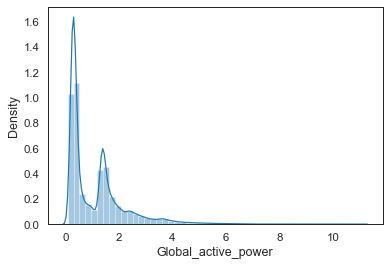

In [24]:
sns.distplot(df.Global_active_power);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Global_active_power)))

In [25]:
df1=df.loc[:,['date_time','Global_active_power']]
df1.set_index('date_time',inplace=True)
df1.head()

,Global_active_power
date_time,
2006-12-16 17:24:00,4.2160
2006-12-16 17:25:00,5.3600
2006-12-16 17:26:00,5.3740
2006-12-16 17:27:00,5.3880
2006-12-16 17:28:00,3.6660


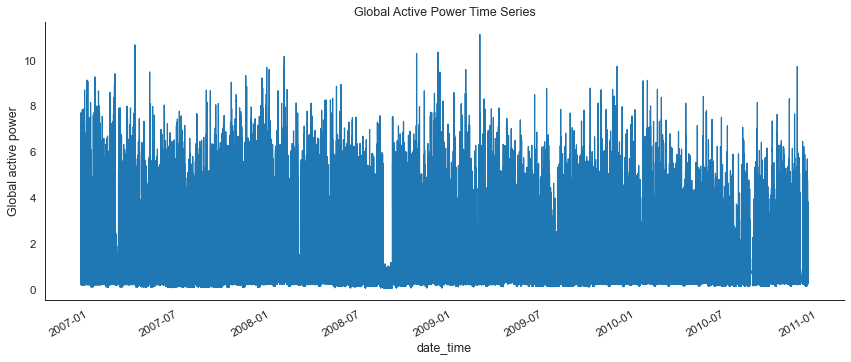

In [26]:
df1.plot(figsize=(12,5))
plt.ylabel('Global active power')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Global Active Power Time Series')
sns.despine(top=True)
plt.show();

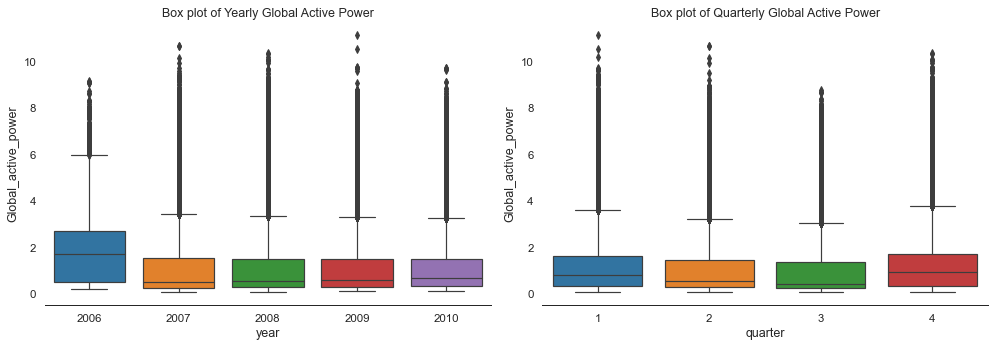

In [27]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="year", y="Global_active_power", data=df)
plt.xlabel('year')
plt.title('Box plot of Yearly Global Active Power')
sns.despine(left=True)
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(x="quarter", y="Global_active_power", data=df)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly Global Active Power')
sns.despine(left=True)
plt.tight_layout();

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2049280.0000,1.0916,1.0573,0.0760,0.3080,0.6020,1.5280,11.1220


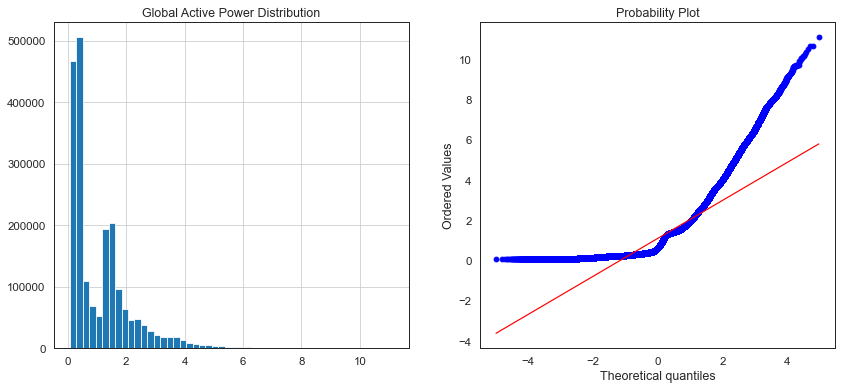

In [28]:
#Global Active Power Distribution
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Global_active_power'].hist(bins=50)
plt.title('Global Active Power Distribution')
plt.subplot(1,2,2)
stats.probplot(df['Global_active_power'], plot=plt);
df1.describe().T

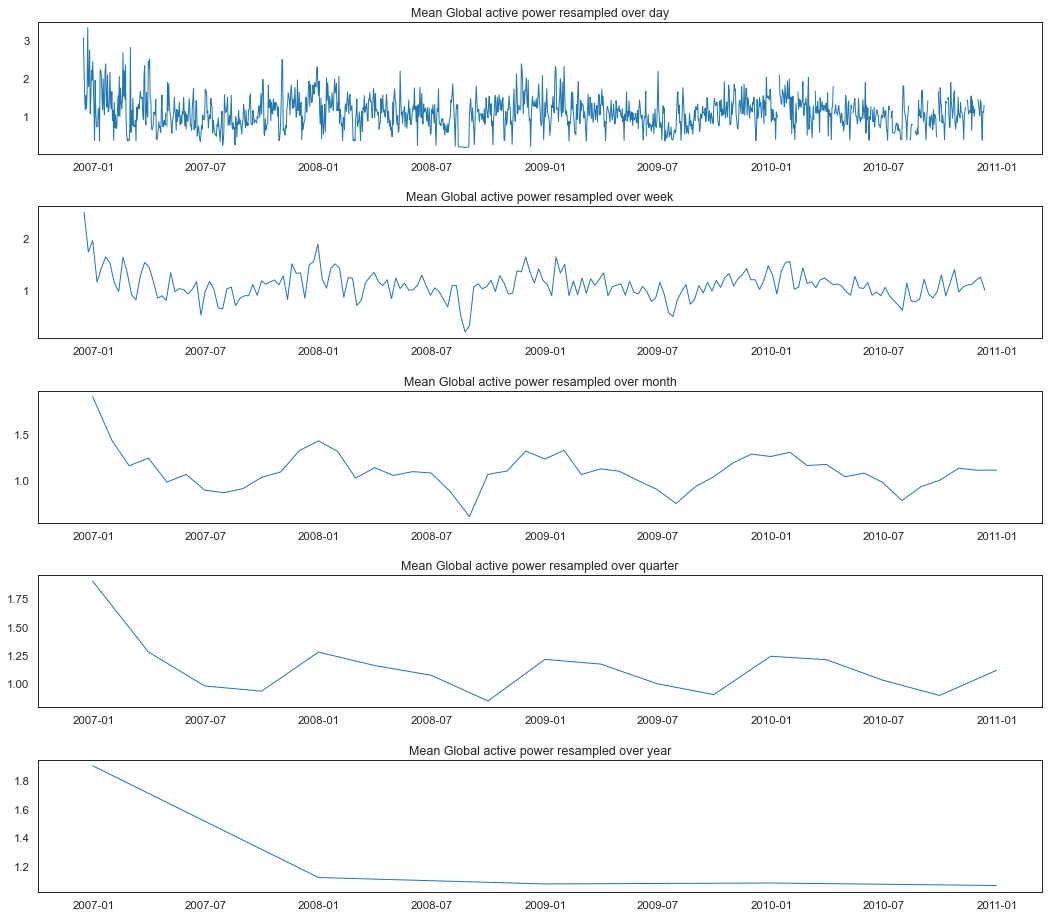

In [29]:
#Average Global Active Power Resampled Over Day, Week, Month, Quarter and Year
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df1['Global_active_power'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Global active power resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(df1['Global_active_power'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Global active power resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(df1['Global_active_power'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Global active power resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(df1['Global_active_power'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean Global active power resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(df1['Global_active_power'].resample('A').mean(),linewidth=1)
ax5.set_title('Mean Global active power resampled over year')
ax5.tick_params(axis='both', which='major');

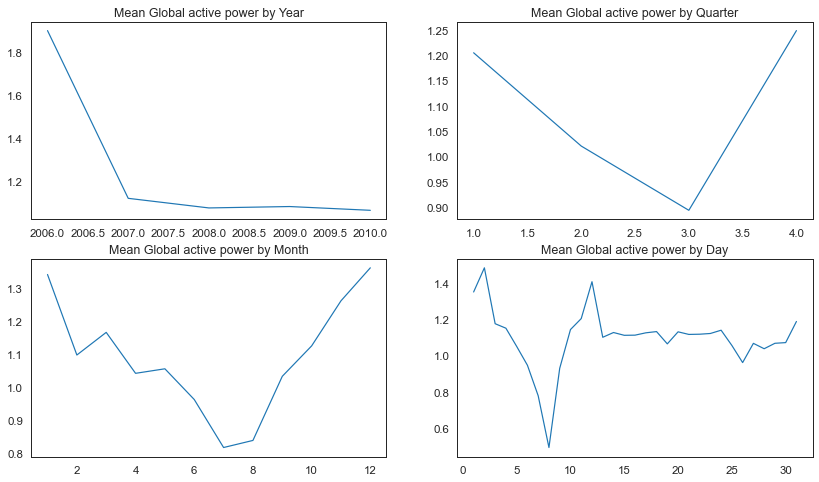

In [30]:
#Plot Mean Global Active Power Grouped by Year, Quarter, Month and Day
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Global active power by Year')

plt.subplot(2,2,2)
df.groupby('quarter').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Global active power by Quarter')

plt.subplot(2,2,3)
df.groupby('month').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Global active power by Month')

plt.subplot(2,2,4)
df.groupby('day').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Global active power by Day');

array([[<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
        <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
        <AxesSubplot:xlabel='month'>],
       [<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
        <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
        <AxesSubplot:xlabel='month'>],
       [<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
        <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
        <AxesSubplot:xlabel='month'>]], dtype=object)

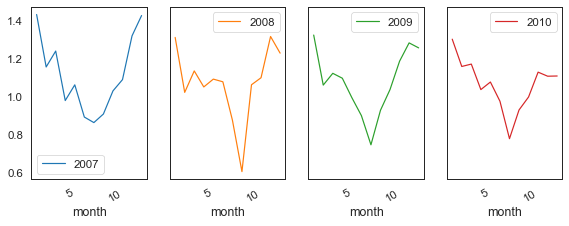

In [31]:
#Global Active Power by Years
pd.pivot_table(df.loc[df['year'] != 2006], values = "Global_active_power", 
               columns = "year", index = "month").plot(subplots = True, figsize=(12, 12), layout=(3, 5), sharey=True)

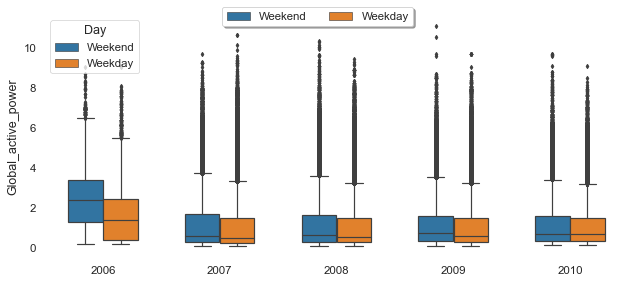

In [32]:
#Global Active Power Consumption in Weekdays vs. Weekends
dic={0:'Weekend',1:'Weekday'}
df['Day'] = df.weekday.map(dic)
a=plt.figure(figsize=(9,4)) 
plt1=sns.boxplot('year','Global_active_power',hue='Day',width=0.6,fliersize=3,
                    data=df)                                                                                                                                                                                                                                                                                                                                                 
a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.xlabel('')
plt.tight_layout()

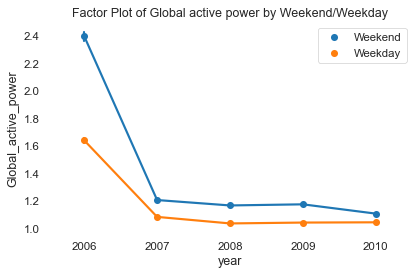

In [33]:
#Factor Plot of Global Active Power by Weekday vs. Weekend
plt1=sns.factorplot('year','Global_active_power',hue='Day',
                    data=df, size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Global active power by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');

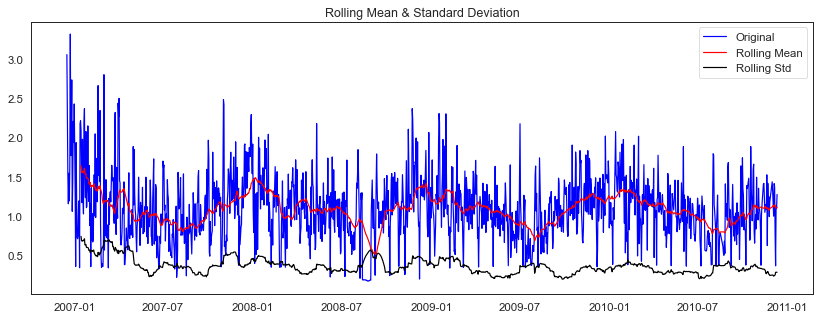

<Results of Dickey-Fuller Test>
Test Statistic                  -8.3277
p-value                          0.0000
#Lags Used                       9.0000
Number of Observations Used   1423.0000
Critical Value (1%)             -3.4350
Critical Value (5%)             -2.8636
Critical Value (10%)            -2.5679
dtype: float64


In [34]:
df2=df1.resample('D').agg(np.mean)

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df2.Global_active_power.dropna())

In [36]:
#LSTM Model

In [37]:
from sklearn.preprocessing import MinMaxScaler

dataset = df.Global_active_power.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

In [1]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

NameError: name 'Sequential' is not defined

NameError: name 'df_resample' is not defined